# Blackbody Radiation

## Ver instructions en https://cdn.pasco.com/lab_experiment/l_1266/EX-5529A_Blackbody_Radiation.pdf

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

### Lista de archivos

In [3]:
!ls

EX-5529A_Blackbody_Radiation.pdf  Plot_Data.ipynb		   README.md
libro2.xlsx			  Plot_Data_PASCO_Blackbody.ipynb


In [4]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Imprime estructura del archivo

In [6]:
from openpyxl import load_workbook
workbook = load_workbook(filename="libro2.xlsx")
print(workbook.sheetnames)

['libro2']


### Imprime columnas

In [ ]:
sheet = workbook['libro2']
n = 0
for col in sheet.iter_cols(values_only=True):
  #print("Column = ",col)
  n += 1
  print("\n\n",n,col)

### Grafica Lambda (nm) vs Index of Refraction

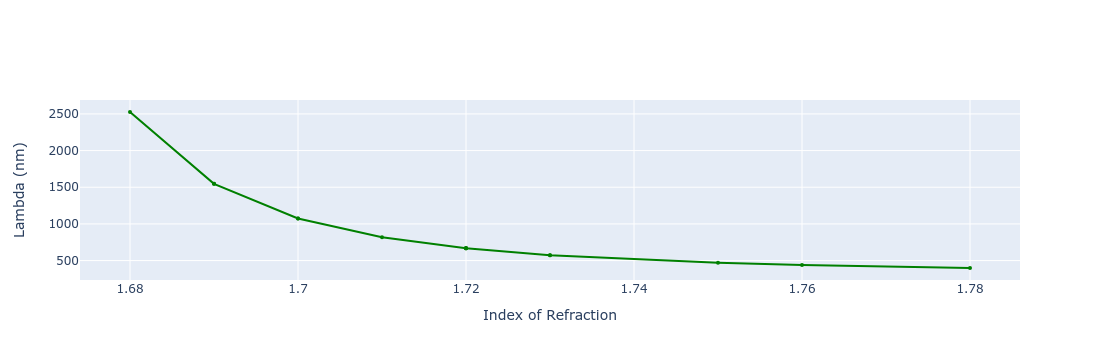

In [8]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 4: X = col
  elif n == 8: Y = col
fig = go.Figure(data=go.Scatter(x=X, y=Y, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Index of Refraction",yaxis_title="Lambda (nm)")
fig.show()

### Grafica Tcal (K) vs rho

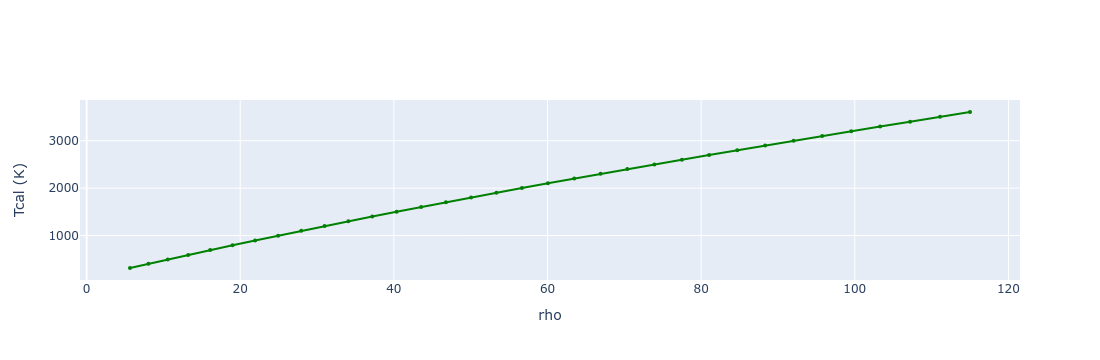

In [9]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 9: X = col
  elif n == 11: Y = col
fig = go.Figure(data=go.Scatter(x=X, y=Y, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="rho",yaxis_title="Tcal (K)")
fig.show()

### Grafica Relative Intensity (%) vs Angle (rad) usando la columna 14

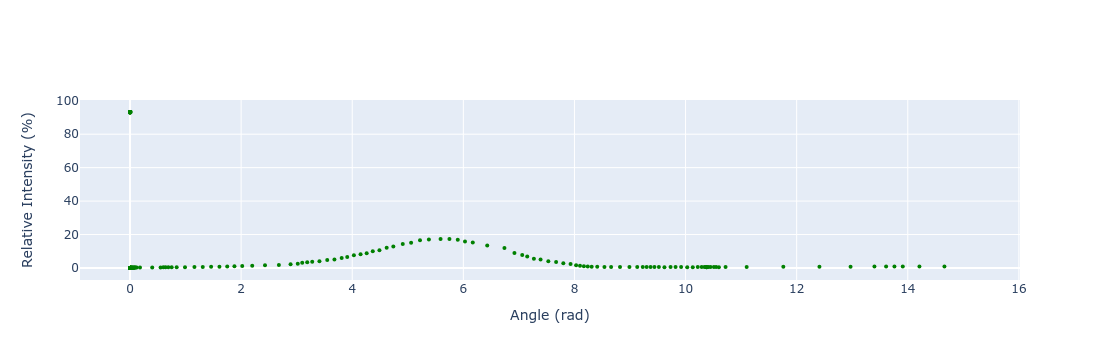

In [12]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 14: X = col
  elif n == 15: Y = col
fig = go.Figure(data=go.Scatter(x=X, y=Y, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Angle (rad)",yaxis_title="Relative Intensity (%)")
fig.show()

### Grafica Relative Intensity (%) vs Angle (rad) pero filtrando los datos para quitar valores espurios

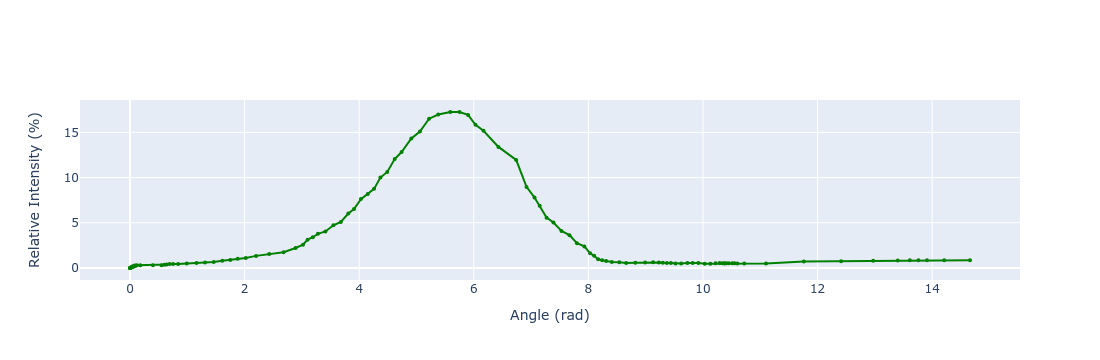

In [17]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
j =1
old = 0
X_filtered=[]
Y_filtered=[]
for i in X:
  if j < len(X)-1:
    j+=1
    if (X[j] is not None and Y[j] is not None):
      if (float(X[j]) <20 and float(Y[j]) <30 and float(X[j]) != old ):
        old = float(X[j])
        X_filtered.append(float(X[j]))
        Y_filtered.append(float(Y[j]))
fig = go.Figure(data=go.Scatter(x=X_filtered, y=Y_filtered, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Angle (rad)",yaxis_title="Relative Intensity (%)")
fig.show()

### Convertimos a True Angle (degrees) usando la fórmula siguiente:

### true angle‎=abs([angle (°)‎])/(AngleCal/100)

### Tomada de https://cdn.pasco.com/lab_experiment/l_1266/EX-5529A_Blackbody_Radiation.pdf

### In this calculation, AngleCal/100 = (angle of Rotary Motion Sensor in degrees)/(angle of the table in degrees) and should have a value of about 60.

### Graficando Relative Intensity (%) vs True Angle (degrees) del archivo xlsx usando la columna 20

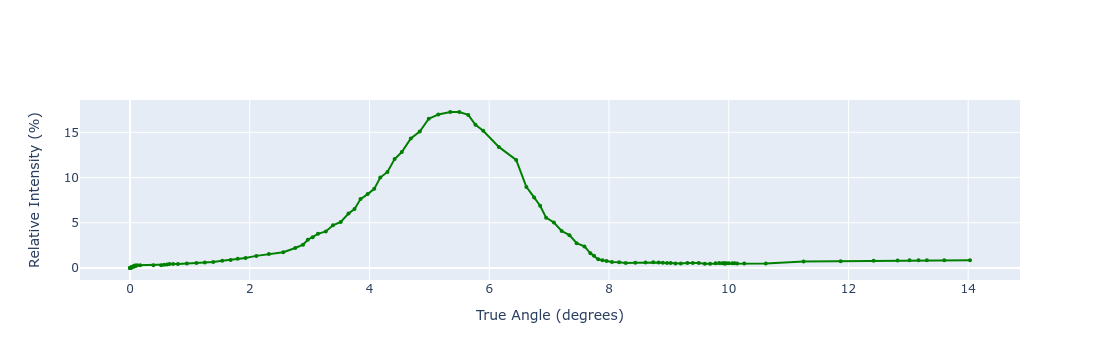

In [26]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np

n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 20: X = col
j =1
old = 0
X_filtered=[]
Y_filtered=[]
for i in X:
  if j < len(X)-1:
    j+=1
    if (X[j] is not None and Y[j] is not None):
      if (float(X[j]) <20 and float(Y[j]) <30 and float(X[j]) != old ):
        old = float(X[j])
        X_filtered.append(float(X[j]))
        Y_filtered.append(float(Y[j]))
fig = go.Figure(data=go.Scatter(x=X_filtered, y=Y_filtered, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="True Angle (degrees)",yaxis_title="Relative Intensity (%)")
fig.show()

### Usamos la ecuación:

### CorrTrueAng‎=[Initial angle]-[true angle]

### con Initial angle] = 68.9

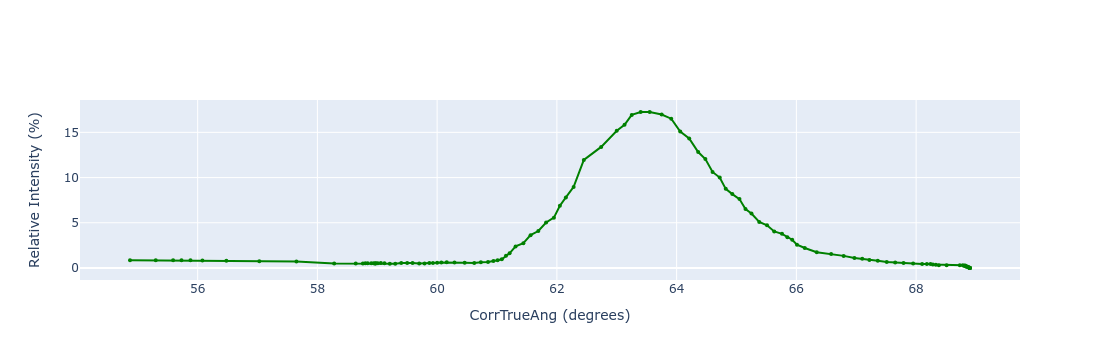

In [28]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
CorrTrueAng = [ 68.9 - i for i in  X_filtered]

fig = go.Figure(data=go.Scatter(x=CorrTrueAng, y=Y_filtered, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="CorrTrueAng (degrees)",yaxis_title="Relative Intensity (%)")
fig.show()

### Obtenemos el Index of Refraction usando la ecuación

### n‎=sqrt((2*sin([CorrTrueAng (°)‎])/sqrt(3)+0.5)^2+3/4)

### Tomada de https://cdn.pasco.com/lab_experiment/l_1266/EX-5529A_Blackbody_Radiation.pdf¶

### Graficamos la Intensidad Relativa vs Longitud de Onda (nm) usando la columna 23

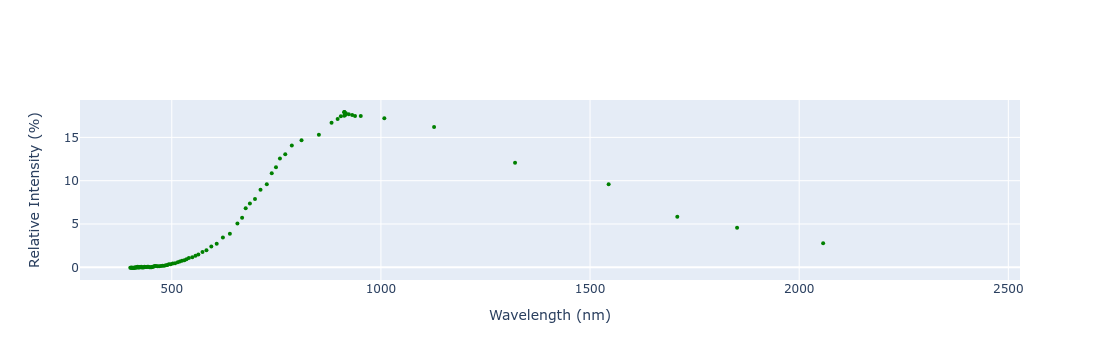

In [85]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 38: X = col
  elif n == 30: Y = col
fig = go.Figure(data=go.Scatter(x=X, y=Y, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Wavelength (nm)",yaxis_title="Relative Intensity (%)")
fig.show()

### Graficamos la Intensidad Relativa vs Longitud de Onda (nm) de 400-2500 nm usando la columna 23 pero filtrando los datos para quitar valores espurios

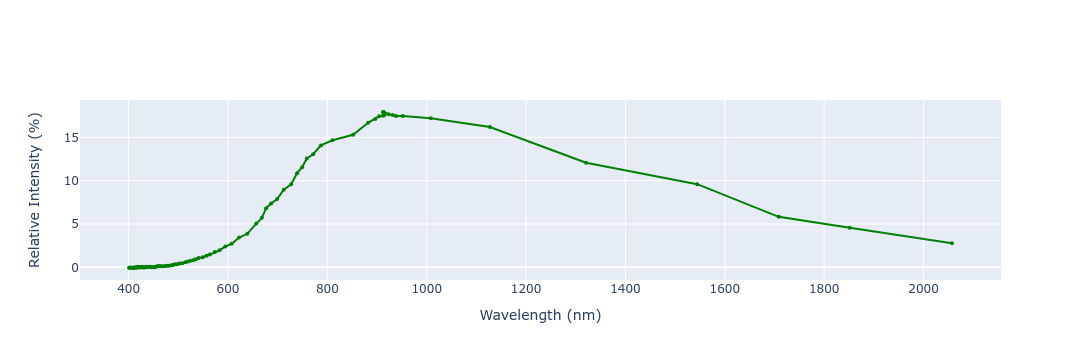

In [86]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
j =1
old = 0
X_filtered=[]
Y_filtered=[]
for i in X:
  if j < len(X)-1:
    j+=1
    if (X[j] is not None and Y[j] is not None):
      if (float(X[j]) != old ):
        old = float(X[j])
        X_filtered.append(float(X[j]))
        Y_filtered.append(float(Y[j]))
fig = go.Figure(data=go.Scatter(x=X_filtered, y=Y_filtered, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Wavelength (nm)",yaxis_title="Relative Intensity (%)")
fig.show()

### Comparamos con la curva teórica dada por

### I‎=([C1]/([λ (nm)‎]/10^9)^5) (1/(exp([C2]/(([λ (nm)]/10^9)*[Temp])-1)))

### Tomada de https://cdn.pasco.com/lab_experiment/l_1266/EX-5529A_Blackbody_Radiation.pdf

### con C1‎=2*π*[Planck's constant (J·s)‎]*[Speed of light (m/s)‎]^2

### C2‎=[Planck's constant (J·s)‎]*[Speed of light (m/s)‎]/[Boltzmann's constant (J/K)‎]

### Distribución de Plank para el cuerpo negro

### Intensity vs Wavelength (Energy in Joules emitted per second per unit wavelength per steradian from one square meter of a blackbody at temperature T)

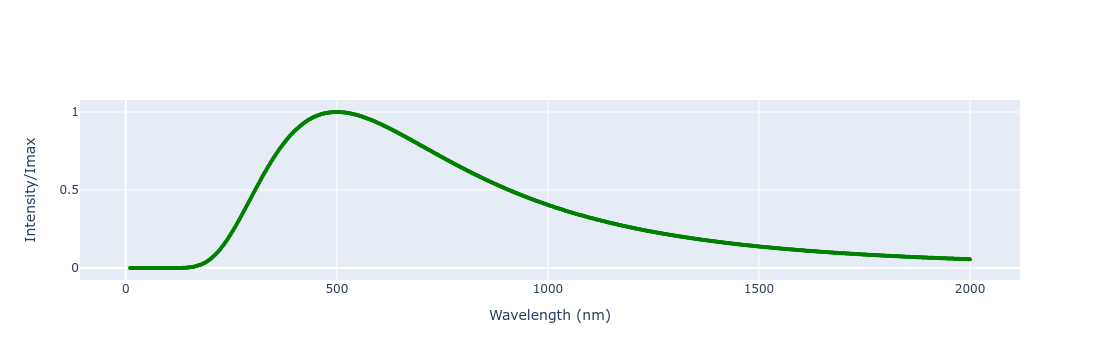

I max =  26882237930093.656


In [92]:
import math
import scipy

lambdas = np.linspace(10, 2000, 1000).tolist()
Temp = 5800

h = scipy.constants.h
c = scipy.constants.c
k = scipy.constants.k
lamdda_peak = (2.897771955/10**3)/Temp*10**9
I_peak =(2*h*c**2/(lamdda_peak/10**9)**5) / (math.exp(h*c/(lamdda_peak/10**9)/k/Temp)-1)
I = []
scala = 1
for long_onda in lambdas:
    try:
        s =(2*h*c**2/(long_onda/10**9)**5) / (math.exp(h*c/(long_onda/10**9)/k/Temp)-1)/I_peak
        I.append(s)
    except OverflowError:
        I.append(0)
fig = go.Figure(data=go.Scatter(x=lambdas, y=I, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Wavelength (nm)",yaxis_title="Intensity/Imax")
fig.show()
print("I max = ",I_peak)

### Agregamos los colores correspondientes en el visible

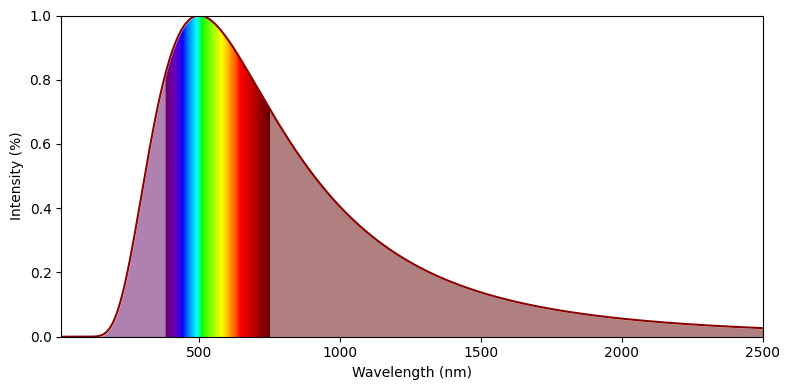

I max =  26882237930093.656


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
lambdas = np.linspace(10, 2500, 1000).tolist()
Temp = 5800 # K

h = scipy.constants.h
c = scipy.constants.c
k = scipy.constants.k
lamdda_peak = (2.897771955/10**3)/Temp*10**9
I_peak =(2*h*c**2/(lamdda_peak/10**9)**5) / (math.exp(h*c/(lamdda_peak/10**9)/k/Temp)-1)
I = []
scala = 1
for long_onda in lambdas:
    try:
        s =(2*h*c**2/(long_onda/10**9)**5) / (math.exp(h*c/(long_onda/10**9)/k/Temp)-1)/I_peak
        I.append(s)
    except OverflowError:
        I.append(0)
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

spectrum = np.array(I)
plt.plot(lambdas, spectrum, color='darkred')

y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(lambdas, y)

extent=(np.min(lambdas), np.max(lambdas), np.min(y), np.max(y))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (%)' )

plt.fill_between(lambdas, spectrum, 1, color='w')
plt.savefig('WavelengthColors.png', dpi=200)

plt.show()
print("I max = ",I_peak)